In [1]:
import pandas as pd
from collections import defaultdict
import warnings
import visualize
import neat
import multiprocessing
import os
import matplotlib.pyplot as plt

import numpy as np

from sklearn.datasets import load_digits
digits = load_digits()

In [2]:
X = digits.images.reshape(digits.images.shape[0], digits.images.shape[1] * digits.images.shape[2])[:1617]
y = digits.target[:1617]

In [3]:
necoc = 100
generations = int(1500/necoc)
generations

15

In [4]:
def softmax(x, axis=1):
    # 计算每行的最大值
    row_max = x.max(axis=axis)
 
    # 每行元素都需要减去对应的最大值，否则求exp(x)会溢出，导致inf情况
    row_max=row_max.reshape(-1, 1)
    x = x - row_max
 
    # 计算e的指数次幂
    x_exp = np.exp(x)
    x_sum = np.sum(x_exp, axis=axis, keepdims=True)
    s = x_exp / x_sum
    return s

In [5]:
def get_winner(class1):
    
    numbers = [*range(10)] # number 2 > number 1
    number_of_classification = len(numbers)
    #number_of_sampling = 100

    list_y = y.tolist()
    digits_indexes = []
    for digit in numbers:
        li = [i for i in range(len(list_y)) if list_y[i] == digit]
        digits_indexes.extend([li])

        
    class2 = []

    class1_indexes = []
    class2_indexes = []

    for i in numbers:
        if i in class1:
            class1_indexes.extend(digits_indexes[i])
        else:
            class2_indexes.extend(digits_indexes[i])
            class2.append(i)

    class1_label = [1] * len(class1_indexes)
    class2_label = [0] * len(class2_indexes)

    print("number of class1:{}".format(len(class1_label)))
    print("number of class2:{}".format(len(class2_label)))

    samplesize = 1617
    x_inputs =[tuple(c) for c in X[class1_indexes].tolist()] + [tuple(c) for c in X[class2_indexes].tolist()]
    x_outputs = [tuple([c]) for c in class1_label + class2_label]
    
    
    def eval_genomes(genomes, config):
        for genome_id, genome in genomes:
            net = neat.nn.FeedForwardNetwork.create(genome, config)

            outputs = []
            for xi in x_inputs:
                output = net.activate(xi)
                outputs.append(output)


            px_outputs = softmax(np.array(outputs).reshape(samplesize, 2), axis=1)
            # the index of maximum in each line
            pred_outputs = np.argmax(px_outputs, axis = 1)
            real_outputs = np.array(x_outputs).reshape(samplesize,)

            acc = np.sum(pred_outputs == real_outputs)/samplesize

            genome.fitness = acc

    def run(config_file):
        # Load configuration.
        config = neat.Config(
            neat.DefaultGenome,
            neat.DefaultReproduction,
            neat.DefaultSpeciesSet,
            neat.DefaultStagnation,
            config_file,
        )

        # Create the population, which is the top-level object for a NEAT run.
        p = neat.Population(config)

        # add a stdout reporter to show progress in the terminal
        reporter = neat.StdOutReporter(False)
        p.add_reporter(reporter)
        stats = neat.StatisticsReporter()
        p.add_reporter(stats)
        #checkpointer = neat.Checkpointer(100)
        #p.add_reporter(checkpointer)
        # Run for up to 300 generations.
        winner = p.run(eval_genomes, generations)

        return [stats, winner]
    
    local_dir = os.getcwd()
    config_path = os.path.join(local_dir, "config-feedforward-mnist2")
    [stats, winner] = run(config_path)
    
    return winner

In [6]:
import numpy as np
import random
while True:
    number_codes = []
    for i in range(2**(10-1), 2**10-1):
        for j in bin(i).split('b')[1]:
            number_codes.append(int(j))
    number_codes = np.array(number_codes).reshape(2**9 - 1,10).T     

    slice = random.sample(range(511), necoc)

    number_codes = number_codes[:,slice].tolist()

    classes = []
    for i in range(necoc):
        code_list = np.array(number_codes).T[i]
        classes.append(np.where(code_list==1)[0].tolist())

    matrix_errors = []

    for i in range(9):
        for j in range(i+1,10):
            matrix_errors.append(necoc - np.sum(np.array(number_codes[i]) == np.array(number_codes[j])))
    min_error = np.min(matrix_errors)
    if min_error != 0:
        print(min_error)
        #print(number_codes)
        break

41


In [7]:
len(number_codes[0])

100

In [8]:
winner_list = []

for class1 in classes:
    winner = get_winner(class1)
    winner_list.append(winner)

number of class1:648
number of class2:969

 ****** Running generation 0 ****** 

Population's average fitness: 0.51962 stdev: 0.11042
Best fitness: 0.75696 - size: (2, 13) - species 4 - id 112
Average adjusted fitness: 0.302
Mean genetic distance 2.822, standard deviation 0.446
Population of 200 members in 15 species
Total extinctions: 0
Generation time: 12.952 sec

 ****** Running generation 1 ****** 

Population's average fitness: 0.57560 stdev: 0.10520
Best fitness: 0.78479 - size: (2, 14) - species 5 - id 322
Average adjusted fitness: 0.313
Mean genetic distance 2.905, standard deviation 0.475
Population of 198 members in 21 species
Total extinctions: 0
Generation time: 12.393 sec (12.673 average)

 ****** Running generation 2 ****** 

Population's average fitness: 0.60111 stdev: 0.10347
Best fitness: 0.80767 - size: (2, 13) - species 1 - id 533
Average adjusted fitness: 0.264
Mean genetic distance 2.933, standard deviation 0.490
Population of 195 members in 21 species
Total extinc

Population's average fitness: 0.59166 stdev: 0.09107
Best fitness: 0.75510 - size: (6, 20) - species 13 - id 1002
Average adjusted fitness: 0.210
Mean genetic distance 3.102, standard deviation 0.489
Population of 201 members in 42 species
Total extinctions: 0
Generation time: 43.401 sec (27.433 average)

 ****** Running generation 10 ****** 

Population's average fitness: 0.60922 stdev: 0.08060
Best fitness: 0.75510 - size: (6, 20) - species 13 - id 1002
Average adjusted fitness: 0.238
Mean genetic distance 3.103, standard deviation 0.486
Population of 197 members in 42 species
Total extinctions: 0
Generation time: 33.134 sec (28.569 average)

 ****** Running generation 11 ****** 

Population's average fitness: 0.59311 stdev: 0.09525
Best fitness: 0.75510 - size: (6, 20) - species 13 - id 1002
Average adjusted fitness: 0.252
Mean genetic distance 3.122, standard deviation 0.496
Population of 203 members in 42 species
Total extinctions: 0
Generation time: 29.900 sec (29.244 average)

 

Population's average fitness: 0.57801 stdev: 0.09575
Best fitness: 0.74335 - size: (3, 15) - species 9 - id 674
Average adjusted fitness: 0.286
Mean genetic distance 3.019, standard deviation 0.517
Population of 202 members in 30 species
Total extinctions: 0
Generation time: 30.816 sec (31.734 average)

 ****** Running generation 4 ****** 

Population's average fitness: 0.59009 stdev: 0.09468
Best fitness: 0.76809 - size: (3, 14) - species 16 - id 831
Average adjusted fitness: 0.311
Mean genetic distance 3.069, standard deviation 0.514
Population of 199 members in 33 species
Total extinctions: 0
Generation time: 32.193 sec (31.826 average)

 ****** Running generation 5 ****** 

Population's average fitness: 0.58635 stdev: 0.09762
Best fitness: 0.76809 - size: (3, 14) - species 16 - id 831
Average adjusted fitness: 0.300
Mean genetic distance 3.096, standard deviation 0.533
Population of 201 members in 34 species
Total extinctions: 0
Generation time: 31.162 sec (31.715 average)

 ******

Population's average fitness: 0.58694 stdev: 0.06853
Best fitness: 0.72418 - size: (4, 16) - species 25 - id 1720
Average adjusted fitness: 0.199
Mean genetic distance 3.149, standard deviation 0.495
Population of 199 members in 36 species
Total extinctions: 0
Generation time: 30.478 sec (29.854 average)

 ****** Running generation 13 ****** 

Population's average fitness: 0.59377 stdev: 0.06486
Best fitness: 0.72418 - size: (4, 16) - species 25 - id 1720
Average adjusted fitness: 0.148
Mean genetic distance 3.166, standard deviation 0.477
Population of 204 members in 38 species
Total extinctions: 0
Generation time: 31.876 sec (30.139 average)

 ****** Running generation 14 ****** 

Population's average fitness: 0.59069 stdev: 0.06992
Best fitness: 0.72418 - size: (4, 16) - species 25 - id 1720
Average adjusted fitness: 0.187
Mean genetic distance 3.189, standard deviation 0.491
Population of 206 members in 38 species
Total extinctions: 0
Generation time: 32.472 sec (30.484 average)
nu

Population's average fitness: 0.68459 stdev: 0.13520
Best fitness: 0.91528 - size: (3, 15) - species 25 - id 1116
Average adjusted fitness: 0.369
Mean genetic distance 3.123, standard deviation 0.509
Population of 204 members in 30 species
Total extinctions: 0
Generation time: 29.861 sec (27.432 average)

 ****** Running generation 7 ****** 

Population's average fitness: 0.68520 stdev: 0.13184
Best fitness: 0.91528 - size: (3, 15) - species 25 - id 1116
Average adjusted fitness: 0.456
Mean genetic distance 3.106, standard deviation 0.505
Population of 198 members in 31 species
Total extinctions: 0
Generation time: 29.771 sec (27.724 average)

 ****** Running generation 8 ****** 

Population's average fitness: 0.68567 stdev: 0.14675
Best fitness: 0.91528 - size: (3, 15) - species 25 - id 1116
Average adjusted fitness: 0.373
Mean genetic distance 3.132, standard deviation 0.494
Population of 201 members in 31 species
Total extinctions: 0
Generation time: 29.524 sec (27.924 average)

 **


 ****** Running generation 0 ****** 

Population's average fitness: 0.50610 stdev: 0.08646
Best fitness: 0.71861 - size: (2, 13) - species 5 - id 154
Average adjusted fitness: 0.176
Mean genetic distance 2.848, standard deviation 0.467
Population of 200 members in 19 species
Total extinctions: 0
Generation time: 23.886 sec

 ****** Running generation 1 ****** 

Population's average fitness: 0.54927 stdev: 0.08566
Best fitness: 0.71861 - size: (2, 13) - species 5 - id 154
Average adjusted fitness: 0.205
Mean genetic distance 2.911, standard deviation 0.485
Population of 200 members in 23 species
Total extinctions: 0
Generation time: 25.050 sec (24.468 average)

 ****** Running generation 2 ****** 

Population's average fitness: 0.58045 stdev: 0.08049
Best fitness: 0.71861 - size: (2, 13) - species 13 - id 154
Average adjusted fitness: 0.217
Mean genetic distance 2.956, standard deviation 0.492
Population of 200 members in 24 species
Total extinctions: 0
Generation time: 26.376 sec (25.

Population's average fitness: 0.59451 stdev: 0.08032
Best fitness: 0.73655 - size: (4, 17) - species 19 - id 969
Average adjusted fitness: 0.224
Mean genetic distance 3.103, standard deviation 0.526
Population of 198 members in 31 species
Total extinctions: 0
Generation time: 29.950 sec (28.017 average)

 ****** Running generation 10 ****** 

Population's average fitness: 0.60320 stdev: 0.08131
Best fitness: 0.73655 - size: (4, 17) - species 19 - id 969
Average adjusted fitness: 0.200
Mean genetic distance 3.106, standard deviation 0.519
Population of 196 members in 32 species
Total extinctions: 0
Generation time: 31.377 sec (28.790 average)

 ****** Running generation 11 ****** 

Population's average fitness: 0.60942 stdev: 0.07983
Best fitness: 0.74273 - size: (2, 14) - species 25 - id 1782
Average adjusted fitness: 0.221
Mean genetic distance 3.099, standard deviation 0.519
Population of 196 members in 32 species
Total extinctions: 0
Generation time: 30.433 sec (29.298 average)

 **

Population's average fitness: 0.57715 stdev: 0.09722
Best fitness: 0.76685 - size: (2, 13) - species 23 - id 118
Average adjusted fitness: 0.276
Mean genetic distance 3.079, standard deviation 0.478
Population of 203 members in 34 species
Total extinctions: 0
Generation time: 27.099 sec (26.074 average)

 ****** Running generation 4 ****** 

Population's average fitness: 0.59085 stdev: 0.08958
Best fitness: 0.76994 - size: (4, 18) - species 6 - id 797
Average adjusted fitness: 0.246
Mean genetic distance 3.071, standard deviation 0.484
Population of 203 members in 34 species
Total extinctions: 0
Generation time: 28.352 sec (26.529 average)

 ****** Running generation 5 ****** 

Population's average fitness: 0.59897 stdev: 0.09109
Best fitness: 0.79777 - size: (3, 14) - species 16 - id 919
Average adjusted fitness: 0.315
Mean genetic distance 3.083, standard deviation 0.485
Population of 201 members in 35 species
Total extinctions: 0
Generation time: 29.067 sec (26.952 average)

 ******

Population's average fitness: 0.64073 stdev: 0.15210
Best fitness: 0.84972 - size: (2, 13) - species 10 - id 305
Average adjusted fitness: 0.347
Mean genetic distance 3.140, standard deviation 0.499
Population of 209 members in 29 species
Total extinctions: 0
Generation time: 32.799 sec (31.431 average)

 ****** Running generation 13 ****** 

Population's average fitness: 0.64071 stdev: 0.15273
Best fitness: 0.84972 - size: (2, 13) - species 10 - id 305
Average adjusted fitness: 0.375
Mean genetic distance 3.132, standard deviation 0.496
Population of 204 members in 29 species
Total extinctions: 0
Generation time: 32.424 sec (31.861 average)

 ****** Running generation 14 ****** 

Population's average fitness: 0.64860 stdev: 0.14412
Best fitness: 0.84972 - size: (2, 13) - species 10 - id 305
Average adjusted fitness: 0.360
Mean genetic distance 3.135, standard deviation 0.493
Population of 202 members in 29 species
Total extinctions: 0
Generation time: 33.513 sec (32.343 average)
numbe

Population's average fitness: 0.57861 stdev: 0.08383
Best fitness: 0.73902 - size: (3, 16) - species 29 - id 813
Average adjusted fitness: 0.207
Mean genetic distance 3.075, standard deviation 0.463
Population of 206 members in 32 species
Total extinctions: 0
Generation time: 29.815 sec (26.968 average)

 ****** Running generation 7 ****** 

Population's average fitness: 0.57542 stdev: 0.09084
Best fitness: 0.73902 - size: (3, 16) - species 32 - id 813
Average adjusted fitness: 0.253
Mean genetic distance 3.139, standard deviation 0.471
Population of 203 members in 32 species
Total extinctions: 0
Generation time: 30.580 sec (27.419 average)

 ****** Running generation 8 ****** 

Population's average fitness: 0.59313 stdev: 0.08326
Best fitness: 0.73902 - size: (3, 16) - species 32 - id 813
Average adjusted fitness: 0.223
Mean genetic distance 3.156, standard deviation 0.478
Population of 202 members in 32 species
Total extinctions: 0
Generation time: 30.128 sec (27.720 average)

 *****


 ****** Running generation 0 ****** 

Population's average fitness: 0.50746 stdev: 0.04967
Best fitness: 0.71490 - size: (2, 13) - species 1 - id 105
Average adjusted fitness: 0.131
Mean genetic distance 2.853, standard deviation 0.475
Population of 201 members in 21 species
Total extinctions: 0
Generation time: 23.674 sec

 ****** Running generation 1 ****** 

Population's average fitness: 0.52948 stdev: 0.05730
Best fitness: 0.71490 - size: (2, 13) - species 1 - id 105
Average adjusted fitness: 0.164
Mean genetic distance 2.950, standard deviation 0.475
Population of 202 members in 26 species
Total extinctions: 0
Generation time: 25.245 sec (24.460 average)

 ****** Running generation 2 ****** 

Population's average fitness: 0.53946 stdev: 0.06492
Best fitness: 0.71490 - size: (2, 13) - species 19 - id 105
Average adjusted fitness: 0.194
Mean genetic distance 2.990, standard deviation 0.500
Population of 202 members in 28 species
Total extinctions: 0
Generation time: 27.014 sec (25.

Population's average fitness: 0.60671 stdev: 0.09003
Best fitness: 0.77180 - size: (4, 15) - species 10 - id 1256
Average adjusted fitness: 0.243
Mean genetic distance 3.272, standard deviation 0.517
Population of 202 members in 40 species
Total extinctions: 0
Generation time: 31.008 sec (29.234 average)

 ****** Running generation 10 ****** 

Population's average fitness: 0.60718 stdev: 0.09901
Best fitness: 0.78108 - size: (5, 17) - species 10 - id 1639
Average adjusted fitness: 0.285
Mean genetic distance 3.273, standard deviation 0.518
Population of 197 members in 40 species
Total extinctions: 0
Generation time: 32.307 sec (30.063 average)

 ****** Running generation 11 ****** 

Population's average fitness: 0.61799 stdev: 0.09400
Best fitness: 0.78108 - size: (5, 17) - species 10 - id 1639
Average adjusted fitness: 0.253
Mean genetic distance 3.287, standard deviation 0.520
Population of 203 members in 40 species
Total extinctions: 0
Generation time: 32.663 sec (30.553 average)

 

Population's average fitness: 0.58270 stdev: 0.12753
Best fitness: 0.80025 - size: (3, 14) - species 5 - id 546
Average adjusted fitness: 0.311
Mean genetic distance 3.014, standard deviation 0.479
Population of 199 members in 27 species
Total extinctions: 0
Generation time: 27.854 sec (26.127 average)

 ****** Running generation 4 ****** 

Population's average fitness: 0.60540 stdev: 0.11921
Best fitness: 0.82189 - size: (5, 20) - species 23 - id 798
Average adjusted fitness: 0.287
Mean genetic distance 3.057, standard deviation 0.474
Population of 205 members in 31 species
Total extinctions: 0
Generation time: 28.183 sec (26.538 average)

 ****** Running generation 5 ****** 

Population's average fitness: 0.61788 stdev: 0.11686
Best fitness: 0.82189 - size: (5, 20) - species 23 - id 798
Average adjusted fitness: 0.295
Mean genetic distance 3.109, standard deviation 0.474
Population of 201 members in 33 species
Total extinctions: 0
Generation time: 30.365 sec (27.176 average)

 ******

Population's average fitness: 0.66978 stdev: 0.13498
Best fitness: 0.85220 - size: (5, 19) - species 26 - id 1583
Average adjusted fitness: 0.374
Mean genetic distance 3.249, standard deviation 0.491
Population of 203 members in 41 species
Total extinctions: 0
Generation time: 31.425 sec (29.845 average)

 ****** Running generation 13 ****** 

Population's average fitness: 0.66715 stdev: 0.13604
Best fitness: 0.85220 - size: (5, 19) - species 26 - id 1583
Average adjusted fitness: 0.398
Mean genetic distance 3.275, standard deviation 0.489
Population of 203 members in 41 species
Total extinctions: 0
Generation time: 31.733 sec (30.275 average)

 ****** Running generation 14 ****** 

Population's average fitness: 0.67660 stdev: 0.12739
Best fitness: 0.85220 - size: (5, 19) - species 26 - id 1583
Average adjusted fitness: 0.376
Mean genetic distance 3.276, standard deviation 0.486
Population of 198 members in 41 species
Total extinctions: 0
Generation time: 31.700 sec (30.617 average)
nu

Population's average fitness: 0.57275 stdev: 0.07619
Best fitness: 0.73593 - size: (4, 18) - species 10 - id 741
Average adjusted fitness: 0.230
Mean genetic distance 3.103, standard deviation 0.462
Population of 196 members in 37 species
Total extinctions: 0
Generation time: 29.404 sec (26.999 average)

 ****** Running generation 7 ****** 

Population's average fitness: 0.58095 stdev: 0.07970
Best fitness: 0.74397 - size: (5, 15) - species 16 - id 1212
Average adjusted fitness: 0.225
Mean genetic distance 3.125, standard deviation 0.477
Population of 200 members in 38 species
Total extinctions: 0
Generation time: 29.824 sec (27.352 average)

 ****** Running generation 8 ****** 

Population's average fitness: 0.58664 stdev: 0.07909
Best fitness: 0.74397 - size: (5, 15) - species 16 - id 1212
Average adjusted fitness: 0.214
Mean genetic distance 3.147, standard deviation 0.491
Population of 201 members in 38 species
Total extinctions: 0
Generation time: 30.053 sec (27.652 average)

 ***


 ****** Running generation 0 ****** 

Population's average fitness: 0.49481 stdev: 0.06215
Best fitness: 0.70501 - size: (2, 13) - species 1 - id 155
Average adjusted fitness: 0.230
Mean genetic distance 2.941, standard deviation 0.475
Population of 200 members in 29 species
Total extinctions: 0
Generation time: 18.449 sec

 ****** Running generation 1 ****** 

Population's average fitness: 0.53761 stdev: 0.06516
Best fitness: 0.70563 - size: (3, 14) - species 6 - id 252
Average adjusted fitness: 0.167
Mean genetic distance 3.055, standard deviation 0.470
Population of 203 members in 37 species
Total extinctions: 0
Generation time: 20.757 sec (19.603 average)

 ****** Running generation 2 ****** 

Population's average fitness: 0.55021 stdev: 0.07888
Best fitness: 0.71243 - size: (3, 16) - species 2 - id 459
Average adjusted fitness: 0.199
Mean genetic distance 3.115, standard deviation 0.469
Population of 198 members in 38 species
Total extinctions: 0
Generation time: 21.386 sec (20.1

Population's average fitness: 0.61113 stdev: 0.07960
Best fitness: 0.76747 - size: (2, 13) - species 2 - id 360
Average adjusted fitness: 0.176
Mean genetic distance 3.131, standard deviation 0.490
Population of 202 members in 33 species
Total extinctions: 0
Generation time: 21.136 sec (19.784 average)

 ****** Running generation 10 ****** 

Population's average fitness: 0.60079 stdev: 0.08258
Best fitness: 0.76747 - size: (2, 13) - species 2 - id 360
Average adjusted fitness: 0.207
Mean genetic distance 3.134, standard deviation 0.490
Population of 202 members in 33 species
Total extinctions: 0
Generation time: 21.609 sec (20.183 average)

 ****** Running generation 11 ****** 

Population's average fitness: 0.60574 stdev: 0.08958
Best fitness: 0.76747 - size: (2, 13) - species 2 - id 360
Average adjusted fitness: 0.241
Mean genetic distance 3.161, standard deviation 0.501
Population of 198 members in 34 species
Total extinctions: 0
Generation time: 21.603 sec (20.520 average)

 ******

Population's average fitness: 0.56796 stdev: 0.08789
Best fitness: 0.75819 - size: (3, 15) - species 5 - id 536
Average adjusted fitness: 0.246
Mean genetic distance 3.045, standard deviation 0.477
Population of 203 members in 32 species
Total extinctions: 0
Generation time: 20.218 sec (18.616 average)

 ****** Running generation 4 ****** 

Population's average fitness: 0.57299 stdev: 0.08637
Best fitness: 0.75819 - size: (3, 15) - species 5 - id 536
Average adjusted fitness: 0.230
Mean genetic distance 3.096, standard deviation 0.465
Population of 199 members in 33 species
Total extinctions: 0
Generation time: 20.306 sec (18.954 average)

 ****** Running generation 5 ****** 

Population's average fitness: 0.58917 stdev: 0.08404
Best fitness: 0.75819 - size: (3, 15) - species 32 - id 536
Average adjusted fitness: 0.259
Mean genetic distance 3.091, standard deviation 0.456
Population of 197 members in 35 species
Total extinctions: 0
Generation time: 20.382 sec (19.192 average)

 ****** 

Population's average fitness: 0.63026 stdev: 0.09571
Best fitness: 0.81138 - size: (6, 22) - species 1 - id 1725
Average adjusted fitness: 0.203
Mean genetic distance 3.279, standard deviation 0.524
Population of 200 members in 35 species
Total extinctions: 0
Generation time: 22.192 sec (21.236 average)

 ****** Running generation 13 ****** 

Population's average fitness: 0.63897 stdev: 0.09069
Best fitness: 0.84539 - size: (5, 19) - species 26 - id 2031
Average adjusted fitness: 0.202
Mean genetic distance 3.230, standard deviation 0.512
Population of 202 members in 35 species
Total extinctions: 0
Generation time: 22.089 sec (21.426 average)

 ****** Running generation 14 ****** 

Population's average fitness: 0.63519 stdev: 0.09565
Best fitness: 0.84539 - size: (5, 19) - species 26 - id 2031
Average adjusted fitness: 0.268
Mean genetic distance 3.219, standard deviation 0.520
Population of 207 members in 35 species
Total extinctions: 0
Generation time: 23.942 sec (21.734 average)
num

Population's average fitness: 0.57052 stdev: 0.07122
Best fitness: 0.70192 - size: (4, 18) - species 18 - id 1132
Average adjusted fitness: 0.217
Mean genetic distance 3.166, standard deviation 0.505
Population of 202 members in 30 species
Total extinctions: 0
Generation time: 21.939 sec (19.911 average)

 ****** Running generation 7 ****** 

Population's average fitness: 0.57343 stdev: 0.07397
Best fitness: 0.73964 - size: (6, 23) - species 7 - id 1269
Average adjusted fitness: 0.190
Mean genetic distance 3.171, standard deviation 0.475
Population of 193 members in 30 species
Total extinctions: 0
Generation time: 22.286 sec (20.208 average)

 ****** Running generation 8 ****** 

Population's average fitness: 0.58335 stdev: 0.07002
Best fitness: 0.73964 - size: (6, 23) - species 7 - id 1269
Average adjusted fitness: 0.223
Mean genetic distance 3.193, standard deviation 0.491
Population of 202 members in 30 species
Total extinctions: 0
Generation time: 21.879 sec (20.393 average)

 ****


 ****** Running generation 0 ****** 

Population's average fitness: 0.49163 stdev: 0.07856
Best fitness: 0.72913 - size: (2, 13) - species 5 - id 74
Average adjusted fitness: 0.272
Mean genetic distance 2.932, standard deviation 0.486
Population of 201 members in 26 species
Total extinctions: 0
Generation time: 17.031 sec

 ****** Running generation 1 ****** 

Population's average fitness: 0.54846 stdev: 0.08729
Best fitness: 0.80581 - size: (3, 14) - species 5 - id 374
Average adjusted fitness: 0.307
Mean genetic distance 2.993, standard deviation 0.453
Population of 201 members in 33 species
Total extinctions: 0
Generation time: 18.343 sec (17.687 average)

 ****** Running generation 2 ****** 

Population's average fitness: 0.57482 stdev: 0.08430
Best fitness: 0.80581 - size: (3, 14) - species 5 - id 374
Average adjusted fitness: 0.147
Mean genetic distance 3.045, standard deviation 0.470
Population of 199 members in 35 species
Total extinctions: 0
Generation time: 19.436 sec (18.27

Population's average fitness: 0.70068 stdev: 0.16266
Best fitness: 0.85281 - size: (6, 20) - species 35 - id 1238
Average adjusted fitness: 0.483
Mean genetic distance 3.120, standard deviation 0.489
Population of 201 members in 38 species
Total extinctions: 0
Generation time: 21.737 sec (19.936 average)

 ****** Running generation 10 ****** 

Population's average fitness: 0.70752 stdev: 0.16063
Best fitness: 0.85281 - size: (6, 20) - species 35 - id 1238
Average adjusted fitness: 0.490
Mean genetic distance 3.127, standard deviation 0.481
Population of 208 members in 40 species
Total extinctions: 0
Generation time: 22.057 sec (20.444 average)

 ****** Running generation 11 ****** 

Population's average fitness: 0.71614 stdev: 0.16457
Best fitness: 0.85281 - size: (6, 20) - species 35 - id 1238
Average adjusted fitness: 0.502
Mean genetic distance 3.138, standard deviation 0.474
Population of 196 members in 40 species
Total extinctions: 0
Generation time: 22.045 sec (20.823 average)

 

Population's average fitness: 0.56264 stdev: 0.06542
Best fitness: 0.69882 - size: (3, 16) - species 5 - id 465
Average adjusted fitness: 0.217
Mean genetic distance 3.074, standard deviation 0.490
Population of 203 members in 34 species
Total extinctions: 0
Generation time: 19.790 sec (18.548 average)

 ****** Running generation 4 ****** 

Population's average fitness: 0.56534 stdev: 0.06534
Best fitness: 0.69882 - size: (3, 16) - species 13 - id 465
Average adjusted fitness: 0.134
Mean genetic distance 3.139, standard deviation 0.493
Population of 201 members in 35 species
Total extinctions: 0
Generation time: 20.410 sec (18.920 average)

 ****** Running generation 5 ****** 

Population's average fitness: 0.57262 stdev: 0.06809
Best fitness: 0.69882 - size: (3, 16) - species 13 - id 465
Average adjusted fitness: 0.191
Mean genetic distance 3.162, standard deviation 0.475
Population of 204 members in 37 species
Total extinctions: 0
Generation time: 20.760 sec (19.227 average)

 ******

Population's average fitness: 0.71208 stdev: 0.12703
Best fitness: 0.86704 - size: (7, 24) - species 20 - id 1867
Average adjusted fitness: 0.409
Mean genetic distance 3.216, standard deviation 0.485
Population of 202 members in 37 species
Total extinctions: 0
Generation time: 21.616 sec (21.238 average)

 ****** Running generation 13 ****** 

Population's average fitness: 0.71907 stdev: 0.12156
Best fitness: 0.86704 - size: (7, 24) - species 20 - id 1867
Average adjusted fitness: 0.414
Mean genetic distance 3.217, standard deviation 0.494
Population of 197 members in 37 species
Total extinctions: 0
Generation time: 21.901 sec (21.434 average)

 ****** Running generation 14 ****** 

Population's average fitness: 0.71443 stdev: 0.12814
Best fitness: 0.86704 - size: (7, 24) - species 20 - id 1867
Average adjusted fitness: 0.431
Mean genetic distance 3.215, standard deviation 0.498
Population of 202 members in 37 species
Total extinctions: 0
Generation time: 21.876 sec (21.549 average)
nu

Population's average fitness: 0.65198 stdev: 0.14011
Best fitness: 0.85220 - size: (3, 17) - species 3 - id 927
Average adjusted fitness: 0.360
Mean genetic distance 3.063, standard deviation 0.452
Population of 201 members in 34 species
Total extinctions: 0
Generation time: 21.393 sec (19.423 average)

 ****** Running generation 7 ****** 

Population's average fitness: 0.62666 stdev: 0.16624
Best fitness: 0.85220 - size: (3, 17) - species 3 - id 927
Average adjusted fitness: 0.323
Mean genetic distance 3.085, standard deviation 0.450
Population of 204 members in 37 species
Total extinctions: 0
Generation time: 20.928 sec (19.611 average)

 ****** Running generation 8 ****** 

Population's average fitness: 0.64478 stdev: 0.15704
Best fitness: 0.85220 - size: (3, 17) - species 3 - id 927
Average adjusted fitness: 0.333
Mean genetic distance 3.130, standard deviation 0.449
Population of 209 members in 37 species
Total extinctions: 0
Generation time: 22.499 sec (19.932 average)

 ****** R


 ****** Running generation 0 ****** 

Population's average fitness: 0.47977 stdev: 0.08736
Best fitness: 0.69017 - size: (2, 13) - species 7 - id 129
Average adjusted fitness: 0.172
Mean genetic distance 2.780, standard deviation 0.420
Population of 199 members in 16 species
Total extinctions: 0
Generation time: 17.221 sec

 ****** Running generation 1 ****** 

Population's average fitness: 0.53820 stdev: 0.08464
Best fitness: 0.69573 - size: (3, 15) - species 1 - id 375
Average adjusted fitness: 0.169
Mean genetic distance 2.914, standard deviation 0.478
Population of 199 members in 25 species
Total extinctions: 0
Generation time: 18.046 sec (17.634 average)

 ****** Running generation 2 ****** 

Population's average fitness: 0.55819 stdev: 0.08490
Best fitness: 0.70686 - size: (3, 15) - species 10 - id 514
Average adjusted fitness: 0.179
Mean genetic distance 2.959, standard deviation 0.507
Population of 199 members in 25 species
Total extinctions: 0
Generation time: 19.129 sec (18.

Population's average fitness: 0.68117 stdev: 0.11192
Best fitness: 0.82251 - size: (3, 15) - species 31 - id 534
Average adjusted fitness: 0.383
Mean genetic distance 3.058, standard deviation 0.500
Population of 197 members in 37 species
Total extinctions: 0
Generation time: 21.592 sec (19.726 average)

 ****** Running generation 10 ****** 

Population's average fitness: 0.67840 stdev: 0.12554
Best fitness: 0.82251 - size: (3, 15) - species 31 - id 534
Average adjusted fitness: 0.404
Mean genetic distance 3.095, standard deviation 0.499
Population of 195 members in 37 species
Total extinctions: 0
Generation time: 21.291 sec (20.138 average)

 ****** Running generation 11 ****** 

Population's average fitness: 0.68188 stdev: 0.12834
Best fitness: 0.82251 - size: (3, 15) - species 31 - id 534
Average adjusted fitness: 0.412
Mean genetic distance 3.102, standard deviation 0.504
Population of 194 members in 37 species
Total extinctions: 0
Generation time: 21.291 sec (20.447 average)

 ***

Population's average fitness: 0.66840 stdev: 0.18932
Best fitness: 0.86766 - size: (4, 16) - species 26 - id 654
Average adjusted fitness: 0.464
Mean genetic distance 3.066, standard deviation 0.510
Population of 200 members in 32 species
Total extinctions: 0
Generation time: 19.603 sec (18.541 average)

 ****** Running generation 4 ****** 

Population's average fitness: 0.70143 stdev: 0.17698
Best fitness: 0.86766 - size: (4, 16) - species 26 - id 654
Average adjusted fitness: 0.493
Mean genetic distance 3.075, standard deviation 0.502
Population of 202 members in 34 species
Total extinctions: 0
Generation time: 19.905 sec (18.814 average)

 ****** Running generation 5 ****** 

Population's average fitness: 0.69763 stdev: 0.17089
Best fitness: 0.86766 - size: (5, 18) - species 2 - id 828
Average adjusted fitness: 0.493
Mean genetic distance 3.124, standard deviation 0.505
Population of 202 members in 36 species
Total extinctions: 0
Generation time: 21.286 sec (19.226 average)

 ******

Population's average fitness: 0.66254 stdev: 0.11175
Best fitness: 0.82313 - size: (4, 19) - species 14 - id 1915
Average adjusted fitness: 0.369
Mean genetic distance 3.255, standard deviation 0.525
Population of 194 members in 29 species
Total extinctions: 0
Generation time: 22.236 sec (21.078 average)

 ****** Running generation 13 ****** 

Population's average fitness: 0.67420 stdev: 0.11744
Best fitness: 0.82622 - size: (8, 26) - species 27 - id 2195
Average adjusted fitness: 0.356
Mean genetic distance 3.238, standard deviation 0.525
Population of 197 members in 29 species
Total extinctions: 0
Generation time: 21.659 sec (21.354 average)

 ****** Running generation 14 ****** 

Population's average fitness: 0.69199 stdev: 0.10267
Best fitness: 0.84416 - size: (6, 23) - species 20 - id 2273
Average adjusted fitness: 0.344
Mean genetic distance 3.246, standard deviation 0.512
Population of 202 members in 29 species
Total extinctions: 0
Generation time: 22.370 sec (21.610 average)
nu

Population's average fitness: 0.60667 stdev: 0.09300
Best fitness: 0.79097 - size: (5, 20) - species 15 - id 1099
Average adjusted fitness: 0.250
Mean genetic distance 3.099, standard deviation 0.484
Population of 199 members in 35 species
Total extinctions: 0
Generation time: 20.573 sec (19.317 average)

 ****** Running generation 7 ****** 

Population's average fitness: 0.61504 stdev: 0.08777
Best fitness: 0.79221 - size: (5, 16) - species 15 - id 1228
Average adjusted fitness: 0.273
Mean genetic distance 3.093, standard deviation 0.490
Population of 196 members in 35 species
Total extinctions: 0
Generation time: 21.222 sec (19.555 average)

 ****** Running generation 8 ****** 

Population's average fitness: 0.61567 stdev: 0.09322
Best fitness: 0.79406 - size: (5, 18) - species 35 - id 1350
Average adjusted fitness: 0.215
Mean genetic distance 3.100, standard deviation 0.497
Population of 197 members in 36 species
Total extinctions: 0
Generation time: 21.118 sec (19.729 average)

 **


 ****** Running generation 0 ****** 

Population's average fitness: 0.52459 stdev: 0.08363
Best fitness: 0.69388 - size: (2, 13) - species 3 - id 87
Average adjusted fitness: 0.242
Mean genetic distance 2.846, standard deviation 0.461
Population of 200 members in 18 species
Total extinctions: 0
Generation time: 17.026 sec

 ****** Running generation 1 ****** 

Population's average fitness: 0.57147 stdev: 0.08416
Best fitness: 0.72171 - size: (2, 14) - species 7 - id 330
Average adjusted fitness: 0.223
Mean genetic distance 3.014, standard deviation 0.484
Population of 199 members in 26 species
Total extinctions: 0
Generation time: 18.087 sec (17.557 average)

 ****** Running generation 2 ****** 

Population's average fitness: 0.57066 stdev: 0.09375
Best fitness: 0.73593 - size: (4, 16) - species 25 - id 515
Average adjusted fitness: 0.288
Mean genetic distance 2.982, standard deviation 0.467
Population of 200 members in 27 species
Total extinctions: 0
Generation time: 19.558 sec (18.2

Population's average fitness: 0.60287 stdev: 0.08793
Best fitness: 0.78788 - size: (4, 17) - species 3 - id 1046
Average adjusted fitness: 0.312
Mean genetic distance 3.226, standard deviation 0.462
Population of 200 members in 44 species
Total extinctions: 0
Generation time: 21.405 sec (19.883 average)

 ****** Running generation 10 ****** 

Population's average fitness: 0.60788 stdev: 0.08988
Best fitness: 0.78788 - size: (4, 17) - species 3 - id 1046
Average adjusted fitness: 0.269
Mean genetic distance 3.231, standard deviation 0.461
Population of 200 members in 44 species
Total extinctions: 0
Generation time: 22.138 sec (20.399 average)

 ****** Running generation 11 ****** 

Population's average fitness: 0.61377 stdev: 0.08579
Best fitness: 0.78788 - size: (4, 17) - species 3 - id 1046
Average adjusted fitness: 0.190
Mean genetic distance 3.203, standard deviation 0.450
Population of 200 members in 45 species
Total extinctions: 0
Generation time: 22.032 sec (20.774 average)

 ***

Population's average fitness: 0.61618 stdev: 0.13198
Best fitness: 0.78293 - size: (4, 17) - species 14 - id 537
Average adjusted fitness: 0.360
Mean genetic distance 3.035, standard deviation 0.527
Population of 204 members in 25 species
Total extinctions: 0
Generation time: 19.829 sec (18.675 average)

 ****** Running generation 4 ****** 

Population's average fitness: 0.61903 stdev: 0.13413
Best fitness: 0.80519 - size: (3, 15) - species 10 - id 756
Average adjusted fitness: 0.323
Mean genetic distance 3.056, standard deviation 0.526
Population of 202 members in 25 species
Total extinctions: 0
Generation time: 21.614 sec (19.263 average)

 ****** Running generation 5 ****** 

Population's average fitness: 0.64535 stdev: 0.11929
Best fitness: 0.80519 - size: (3, 15) - species 10 - id 756
Average adjusted fitness: 0.377
Mean genetic distance 3.108, standard deviation 0.511
Population of 204 members in 25 species
Total extinctions: 0
Generation time: 20.598 sec (19.486 average)

 *****

Population's average fitness: 0.60613 stdev: 0.08160
Best fitness: 0.72851 - size: (11, 31) - species 34 - id 1913
Average adjusted fitness: 0.258
Mean genetic distance 3.156, standard deviation 0.483
Population of 204 members in 39 species
Total extinctions: 0
Generation time: 23.235 sec (22.143 average)

 ****** Running generation 13 ****** 

Population's average fitness: 0.61097 stdev: 0.07864
Best fitness: 0.72851 - size: (11, 31) - species 34 - id 1913
Average adjusted fitness: 0.240
Mean genetic distance 3.162, standard deviation 0.481
Population of 199 members in 39 species
Total extinctions: 0
Generation time: 23.865 sec (22.476 average)

 ****** Running generation 14 ****** 

Population's average fitness: 0.61831 stdev: 0.07229
Best fitness: 0.72851 - size: (11, 31) - species 34 - id 2039
Average adjusted fitness: 0.222
Mean genetic distance 3.168, standard deviation 0.483
Population of 199 members in 39 species
Total extinctions: 0
Generation time: 24.317 sec (22.858 average)

Population's average fitness: 0.62109 stdev: 0.13564
Best fitness: 0.77180 - size: (5, 19) - species 37 - id 895
Average adjusted fitness: 0.327
Mean genetic distance 3.090, standard deviation 0.472
Population of 198 members in 38 species
Total extinctions: 0
Generation time: 20.730 sec (19.520 average)

 ****** Running generation 7 ****** 

Population's average fitness: 0.63822 stdev: 0.12567
Best fitness: 0.77180 - size: (5, 19) - species 37 - id 895
Average adjusted fitness: 0.350
Mean genetic distance 3.122, standard deviation 0.466
Population of 198 members in 38 species
Total extinctions: 0
Generation time: 21.149 sec (19.723 average)

 ****** Running generation 8 ****** 

Population's average fitness: 0.64621 stdev: 0.11151
Best fitness: 0.77180 - size: (5, 19) - species 37 - id 895
Average adjusted fitness: 0.335
Mean genetic distance 3.154, standard deviation 0.464
Population of 207 members in 39 species
Total extinctions: 0
Generation time: 21.044 sec (19.870 average)

 *****


 ****** Running generation 0 ****** 

Population's average fitness: 0.49112 stdev: 0.11247
Best fitness: 0.77242 - size: (2, 13) - species 3 - id 135
Average adjusted fitness: 0.246
Mean genetic distance 2.908, standard deviation 0.473
Population of 199 members in 20 species
Total extinctions: 0
Generation time: 17.042 sec

 ****** Running generation 1 ****** 

Population's average fitness: 0.53940 stdev: 0.11243
Best fitness: 0.78664 - size: (3, 14) - species 8 - id 203
Average adjusted fitness: 0.315
Mean genetic distance 3.005, standard deviation 0.487
Population of 199 members in 24 species
Total extinctions: 0
Generation time: 18.406 sec (17.724 average)

 ****** Running generation 2 ****** 

Population's average fitness: 0.58544 stdev: 0.10182
Best fitness: 0.81200 - size: (3, 16) - species 17 - id 472
Average adjusted fitness: 0.321
Mean genetic distance 3.016, standard deviation 0.491
Population of 199 members in 28 species
Total extinctions: 0
Generation time: 18.862 sec (18.

Population's average fitness: 0.64981 stdev: 0.11844
Best fitness: 0.78293 - size: (4, 15) - species 25 - id 1368
Average adjusted fitness: 0.345
Mean genetic distance 3.092, standard deviation 0.500
Population of 204 members in 31 species
Total extinctions: 0
Generation time: 21.893 sec (19.854 average)

 ****** Running generation 10 ****** 

Population's average fitness: 0.64264 stdev: 0.12012
Best fitness: 0.78293 - size: (4, 15) - species 25 - id 1368
Average adjusted fitness: 0.344
Mean genetic distance 3.069, standard deviation 0.493
Population of 193 members in 31 species
Total extinctions: 0
Generation time: 22.482 sec (20.407 average)

 ****** Running generation 11 ****** 

Population's average fitness: 0.66465 stdev: 0.10523
Best fitness: 0.78293 - size: (4, 15) - species 25 - id 1368
Average adjusted fitness: 0.370
Mean genetic distance 3.085, standard deviation 0.501
Population of 200 members in 31 species
Total extinctions: 0
Generation time: 21.201 sec (20.708 average)

 

Population's average fitness: 0.61205 stdev: 0.14092
Best fitness: 0.80767 - size: (2, 14) - species 25 - id 359
Average adjusted fitness: 0.417
Mean genetic distance 3.095, standard deviation 0.522
Population of 200 members in 32 species
Total extinctions: 0
Generation time: 19.240 sec (18.328 average)

 ****** Running generation 4 ****** 

Population's average fitness: 0.61784 stdev: 0.14131
Best fitness: 0.80767 - size: (2, 14) - species 25 - id 359
Average adjusted fitness: 0.355
Mean genetic distance 3.111, standard deviation 0.519
Population of 205 members in 33 species
Total extinctions: 0
Generation time: 19.967 sec (18.656 average)

 ****** Running generation 5 ****** 

Population's average fitness: 0.62342 stdev: 0.13685
Best fitness: 0.81138 - size: (2, 14) - species 1 - id 960
Average adjusted fitness: 0.365
Mean genetic distance 3.109, standard deviation 0.520
Population of 203 members in 33 species
Total extinctions: 0
Generation time: 20.522 sec (18.967 average)

 ******

Population's average fitness: 0.57910 stdev: 0.06304
Best fitness: 0.70068 - size: (4, 17) - species 20 - id 917
Average adjusted fitness: 0.156
Mean genetic distance 3.147, standard deviation 0.512
Population of 200 members in 38 species
Total extinctions: 0
Generation time: 22.167 sec (21.102 average)

 ****** Running generation 13 ****** 

Population's average fitness: 0.58299 stdev: 0.06383
Best fitness: 0.70068 - size: (4, 17) - species 20 - id 917
Average adjusted fitness: 0.175
Mean genetic distance 3.164, standard deviation 0.516
Population of 202 members in 38 species
Total extinctions: 0
Generation time: 22.089 sec (21.342 average)

 ****** Running generation 14 ****** 

Population's average fitness: 0.57726 stdev: 0.06773
Best fitness: 0.70068 - size: (4, 17) - species 20 - id 917
Average adjusted fitness: 0.181
Mean genetic distance 3.114, standard deviation 0.512
Population of 200 members in 38 species
Total extinctions: 0
Generation time: 22.020 sec (21.462 average)
numbe

Population's average fitness: 0.68139 stdev: 0.13815
Best fitness: 0.87384 - size: (4, 15) - species 18 - id 831
Average adjusted fitness: 0.454
Mean genetic distance 3.134, standard deviation 0.474
Population of 198 members in 34 species
Total extinctions: 0
Generation time: 21.268 sec (19.375 average)

 ****** Running generation 7 ****** 

Population's average fitness: 0.68314 stdev: 0.12830
Best fitness: 0.88559 - size: (4, 13) - species 18 - id 1219
Average adjusted fitness: 0.370
Mean genetic distance 3.171, standard deviation 0.477
Population of 200 members in 34 species
Total extinctions: 0
Generation time: 22.516 sec (19.767 average)

 ****** Running generation 8 ****** 

Population's average fitness: 0.68923 stdev: 0.13250
Best fitness: 0.88745 - size: (5, 14) - species 18 - id 1355
Average adjusted fitness: 0.381
Mean genetic distance 3.187, standard deviation 0.487
Population of 204 members in 34 species
Total extinctions: 0
Generation time: 22.560 sec (20.078 average)

 ***


 ****** Running generation 0 ****** 

Population's average fitness: 0.50049 stdev: 0.06512
Best fitness: 0.69697 - size: (2, 13) - species 5 - id 33
Average adjusted fitness: 0.192
Mean genetic distance 2.937, standard deviation 0.470
Population of 199 members in 26 species
Total extinctions: 0
Generation time: 17.222 sec

 ****** Running generation 1 ****** 

Population's average fitness: 0.53594 stdev: 0.07565
Best fitness: 0.76994 - size: (3, 15) - species 4 - id 342
Average adjusted fitness: 0.215
Mean genetic distance 3.033, standard deviation 0.484
Population of 201 members in 32 species
Total extinctions: 0
Generation time: 18.177 sec (17.699 average)

 ****** Running generation 2 ****** 

Population's average fitness: 0.56236 stdev: 0.08330
Best fitness: 0.76994 - size: (3, 15) - species 4 - id 342
Average adjusted fitness: 0.198
Mean genetic distance 3.040, standard deviation 0.472
Population of 202 members in 33 species
Total extinctions: 0
Generation time: 19.182 sec (18.19

Population's average fitness: 0.59751 stdev: 0.08680
Best fitness: 0.78046 - size: (5, 17) - species 1 - id 736
Average adjusted fitness: 0.239
Mean genetic distance 3.196, standard deviation 0.511
Population of 192 members in 40 species
Total extinctions: 0
Generation time: 21.730 sec (20.028 average)

 ****** Running generation 10 ****** 

Population's average fitness: 0.60895 stdev: 0.08617
Best fitness: 0.78046 - size: (5, 17) - species 1 - id 736
Average adjusted fitness: 0.193
Mean genetic distance 3.199, standard deviation 0.508
Population of 196 members in 40 species
Total extinctions: 0
Generation time: 20.671 sec (20.404 average)

 ****** Running generation 11 ****** 

Population's average fitness: 0.60980 stdev: 0.08429
Best fitness: 0.78046 - size: (5, 17) - species 1 - id 736
Average adjusted fitness: 0.179
Mean genetic distance 3.234, standard deviation 0.522
Population of 200 members in 40 species
Total extinctions: 0
Generation time: 21.582 sec (20.753 average)

 ******

Population's average fitness: 0.65269 stdev: 0.10708
Best fitness: 0.79530 - size: (2, 13) - species 7 - id 65
Average adjusted fitness: 0.365
Mean genetic distance 3.078, standard deviation 0.460
Population of 203 members in 35 species
Total extinctions: 0
Generation time: 19.765 sec (18.504 average)

 ****** Running generation 4 ****** 

Population's average fitness: 0.64912 stdev: 0.10800
Best fitness: 0.79530 - size: (2, 13) - species 7 - id 65
Average adjusted fitness: 0.341
Mean genetic distance 3.099, standard deviation 0.474
Population of 204 members in 36 species
Total extinctions: 0
Generation time: 21.392 sec (19.081 average)

 ****** Running generation 5 ****** 

Population's average fitness: 0.65669 stdev: 0.10691
Best fitness: 0.79530 - size: (2, 13) - species 7 - id 65
Average adjusted fitness: 0.360
Mean genetic distance 3.108, standard deviation 0.481
Population of 204 members in 36 species
Total extinctions: 0
Generation time: 20.782 sec (19.365 average)

 ****** Runn

Population's average fitness: 0.68921 stdev: 0.13330
Best fitness: 0.86827 - size: (3, 16) - species 11 - id 1513
Average adjusted fitness: 0.442
Mean genetic distance 3.178, standard deviation 0.483
Population of 202 members in 39 species
Total extinctions: 0
Generation time: 22.498 sec (22.027 average)

 ****** Running generation 13 ****** 

Population's average fitness: 0.69759 stdev: 0.12959
Best fitness: 0.86827 - size: (3, 16) - species 11 - id 1513
Average adjusted fitness: 0.415
Mean genetic distance 3.170, standard deviation 0.483
Population of 206 members in 39 species
Total extinctions: 0
Generation time: 22.949 sec (22.207 average)

 ****** Running generation 14 ****** 

Population's average fitness: 0.70545 stdev: 0.12744
Best fitness: 0.86827 - size: (3, 16) - species 11 - id 1513
Average adjusted fitness: 0.397
Mean genetic distance 3.152, standard deviation 0.489
Population of 204 members in 39 species
Total extinctions: 0
Generation time: 23.641 sec (22.385 average)
nu

Population's average fitness: 0.59429 stdev: 0.08481
Best fitness: 0.72356 - size: (3, 16) - species 18 - id 816
Average adjusted fitness: 0.308
Mean genetic distance 3.120, standard deviation 0.498
Population of 203 members in 33 species
Total extinctions: 0
Generation time: 20.186 sec (19.140 average)

 ****** Running generation 7 ****** 

Population's average fitness: 0.58882 stdev: 0.09259
Best fitness: 0.72356 - size: (3, 16) - species 18 - id 816
Average adjusted fitness: 0.252
Mean genetic distance 3.115, standard deviation 0.508
Population of 195 members in 34 species
Total extinctions: 0
Generation time: 21.027 sec (19.376 average)

 ****** Running generation 8 ****** 

Population's average fitness: 0.59723 stdev: 0.08607
Best fitness: 0.72356 - size: (3, 16) - species 18 - id 816
Average adjusted fitness: 0.266
Mean genetic distance 3.099, standard deviation 0.496
Population of 203 members in 35 species
Total extinctions: 0
Generation time: 20.121 sec (19.458 average)

 *****


 ****** Running generation 0 ****** 

Population's average fitness: 0.51380 stdev: 0.09732
Best fitness: 0.70130 - size: (2, 13) - species 3 - id 189
Average adjusted fitness: 0.279
Mean genetic distance 2.845, standard deviation 0.479
Population of 199 members in 23 species
Total extinctions: 0
Generation time: 17.620 sec

 ****** Running generation 1 ****** 

Population's average fitness: 0.56170 stdev: 0.08390
Best fitness: 0.74459 - size: (2, 13) - species 10 - id 297
Average adjusted fitness: 0.251
Mean genetic distance 2.973, standard deviation 0.496
Population of 197 members in 28 species
Total extinctions: 0
Generation time: 18.610 sec (18.115 average)

 ****** Running generation 2 ****** 

Population's average fitness: 0.56937 stdev: 0.09811
Best fitness: 0.75819 - size: (3, 13) - species 11 - id 530
Average adjusted fitness: 0.280
Mean genetic distance 3.034, standard deviation 0.489
Population of 198 members in 29 species
Total extinctions: 0
Generation time: 18.613 sec (18

Population's average fitness: 0.67507 stdev: 0.22758
Best fitness: 0.89054 - size: (7, 25) - species 36 - id 1435
Average adjusted fitness: 0.536
Mean genetic distance 3.162, standard deviation 0.487
Population of 203 members in 37 species
Total extinctions: 0
Generation time: 22.331 sec (20.776 average)

 ****** Running generation 10 ****** 

Population's average fitness: 0.71823 stdev: 0.18401
Best fitness: 0.89054 - size: (7, 25) - species 36 - id 1435
Average adjusted fitness: 0.510
Mean genetic distance 3.173, standard deviation 0.481
Population of 203 members in 37 species
Total extinctions: 0
Generation time: 23.090 sec (21.310 average)

 ****** Running generation 11 ****** 

Population's average fitness: 0.70000 stdev: 0.21053
Best fitness: 0.89549 - size: (5, 17) - species 18 - id 1738
Average adjusted fitness: 0.487
Mean genetic distance 3.194, standard deviation 0.477
Population of 200 members in 37 species
Total extinctions: 0
Generation time: 23.199 sec (21.807 average)

 

Population's average fitness: 0.60924 stdev: 0.09828
Best fitness: 0.81880 - size: (4, 19) - species 6 - id 695
Average adjusted fitness: 0.249
Mean genetic distance 3.070, standard deviation 0.497
Population of 198 members in 29 species
Total extinctions: 0
Generation time: 19.921 sec (18.599 average)

 ****** Running generation 4 ****** 

Population's average fitness: 0.62081 stdev: 0.09402
Best fitness: 0.83055 - size: (4, 16) - species 5 - id 824
Average adjusted fitness: 0.287
Mean genetic distance 3.131, standard deviation 0.493
Population of 202 members in 30 species
Total extinctions: 0
Generation time: 19.855 sec (18.850 average)

 ****** Running generation 5 ****** 

Population's average fitness: 0.62778 stdev: 0.09464
Best fitness: 0.83055 - size: (4, 16) - species 5 - id 824
Average adjusted fitness: 0.346
Mean genetic distance 3.144, standard deviation 0.486
Population of 194 members in 33 species
Total extinctions: 0
Generation time: 20.877 sec (19.188 average)

 ****** R

Population's average fitness: 0.72402 stdev: 0.17929
Best fitness: 0.89177 - size: (4, 15) - species 2 - id 1748
Average adjusted fitness: 0.561
Mean genetic distance 3.111, standard deviation 0.507
Population of 194 members in 37 species
Total extinctions: 0
Generation time: 24.297 sec (21.295 average)

 ****** Running generation 13 ****** 

Population's average fitness: 0.73083 stdev: 0.17078
Best fitness: 0.89177 - size: (4, 15) - species 2 - id 1748
Average adjusted fitness: 0.531
Mean genetic distance 3.123, standard deviation 0.518
Population of 199 members in 37 species
Total extinctions: 0
Generation time: 20.941 sec (21.426 average)

 ****** Running generation 14 ****** 

Population's average fitness: 0.73335 stdev: 0.17462
Best fitness: 0.89177 - size: (4, 15) - species 2 - id 1748
Average adjusted fitness: 0.577
Mean genetic distance 3.139, standard deviation 0.507
Population of 195 members in 38 species
Total extinctions: 0
Generation time: 22.124 sec (21.657 average)
numbe

Population's average fitness: 0.76466 stdev: 0.21231
Best fitness: 0.92641 - size: (4, 17) - species 29 - id 964
Average adjusted fitness: 0.649
Mean genetic distance 2.946, standard deviation 0.492
Population of 200 members in 29 species
Total extinctions: 0
Generation time: 20.229 sec (19.121 average)

 ****** Running generation 7 ****** 

Population's average fitness: 0.79328 stdev: 0.18517
Best fitness: 0.92641 - size: (4, 17) - species 29 - id 964
Average adjusted fitness: 0.676
Mean genetic distance 2.934, standard deviation 0.502
Population of 204 members in 29 species
Total extinctions: 0
Generation time: 20.044 sec (19.236 average)

 ****** Running generation 8 ****** 

Population's average fitness: 0.77426 stdev: 0.21223
Best fitness: 0.92641 - size: (4, 17) - species 29 - id 964
Average adjusted fitness: 0.660
Mean genetic distance 2.922, standard deviation 0.506
Population of 203 members in 29 species
Total extinctions: 0
Generation time: 20.748 sec (19.404 average)

 *****


 ****** Running generation 0 ****** 

Population's average fitness: 0.49595 stdev: 0.04554
Best fitness: 0.63451 - size: (2, 13) - species 7 - id 120
Average adjusted fitness: 0.119
Mean genetic distance 2.904, standard deviation 0.449
Population of 199 members in 26 species
Total extinctions: 0
Generation time: 17.160 sec

 ****** Running generation 1 ****** 

Population's average fitness: 0.51996 stdev: 0.05424
Best fitness: 0.67594 - size: (3, 15) - species 2 - id 355
Average adjusted fitness: 0.150
Mean genetic distance 3.001, standard deviation 0.464
Population of 202 members in 30 species
Total extinctions: 0
Generation time: 18.249 sec (17.704 average)

 ****** Running generation 2 ****** 

Population's average fitness: 0.53317 stdev: 0.05249
Best fitness: 0.67594 - size: (3, 15) - species 2 - id 355
Average adjusted fitness: 0.111
Mean genetic distance 3.013, standard deviation 0.470
Population of 203 members in 33 species
Total extinctions: 0
Generation time: 19.303 sec (18.2

Population's average fitness: 0.60841 stdev: 0.09275
Best fitness: 0.79839 - size: (6, 20) - species 34 - id 1286
Average adjusted fitness: 0.254
Mean genetic distance 3.090, standard deviation 0.490
Population of 193 members in 39 species
Total extinctions: 0
Generation time: 21.857 sec (20.029 average)

 ****** Running generation 10 ****** 

Population's average fitness: 0.62511 stdev: 0.09274
Best fitness: 0.79963 - size: (6, 22) - species 6 - id 1512
Average adjusted fitness: 0.296
Mean genetic distance 3.106, standard deviation 0.482
Population of 202 members in 39 species
Total extinctions: 0
Generation time: 21.207 sec (20.432 average)

 ****** Running generation 11 ****** 

Population's average fitness: 0.62662 stdev: 0.09268
Best fitness: 0.82189 - size: (7, 21) - species 34 - id 1642
Average adjusted fitness: 0.233
Mean genetic distance 3.099, standard deviation 0.481
Population of 199 members in 39 species
Total extinctions: 0
Generation time: 22.641 sec (20.855 average)

 *

Population's average fitness: 0.66519 stdev: 0.09201
Best fitness: 0.83921 - size: (2, 13) - species 21 - id 181
Average adjusted fitness: 0.365
Mean genetic distance 2.959, standard deviation 0.502
Population of 201 members in 25 species
Total extinctions: 0
Generation time: 19.621 sec (18.436 average)

 ****** Running generation 4 ****** 

Population's average fitness: 0.67116 stdev: 0.09667
Best fitness: 0.83921 - size: (2, 13) - species 21 - id 181
Average adjusted fitness: 0.366
Mean genetic distance 3.023, standard deviation 0.517
Population of 199 members in 26 species
Total extinctions: 0
Generation time: 20.400 sec (18.829 average)

 ****** Running generation 5 ****** 

Population's average fitness: 0.65131 stdev: 0.12535
Best fitness: 0.83921 - size: (2, 13) - species 8 - id 181
Average adjusted fitness: 0.393
Mean genetic distance 3.075, standard deviation 0.534
Population of 200 members in 28 species
Total extinctions: 0
Generation time: 20.959 sec (19.184 average)

 ******

Population's average fitness: 0.67381 stdev: 0.16591
Best fitness: 0.90353 - size: (4, 18) - species 3 - id 1348
Average adjusted fitness: 0.364
Mean genetic distance 3.188, standard deviation 0.465
Population of 197 members in 45 species
Total extinctions: 0
Generation time: 22.451 sec (21.620 average)

 ****** Running generation 13 ****** 

Population's average fitness: 0.68574 stdev: 0.16294
Best fitness: 0.90353 - size: (4, 18) - species 3 - id 1348
Average adjusted fitness: 0.407
Mean genetic distance 3.171, standard deviation 0.463
Population of 194 members in 45 species
Total extinctions: 0
Generation time: 21.963 sec (21.822 average)

 ****** Running generation 14 ****** 

Population's average fitness: 0.69890 stdev: 0.14729
Best fitness: 0.90353 - size: (4, 18) - species 3 - id 1348
Average adjusted fitness: 0.380
Mean genetic distance 3.176, standard deviation 0.457
Population of 207 members in 45 species
Total extinctions: 0
Generation time: 22.321 sec (22.045 average)
numbe

Population's average fitness: 0.62148 stdev: 0.07525
Best fitness: 0.76190 - size: (4, 17) - species 19 - id 842
Average adjusted fitness: 0.288
Mean genetic distance 3.060, standard deviation 0.471
Population of 198 members in 40 species
Total extinctions: 0
Generation time: 21.474 sec (19.437 average)

 ****** Running generation 7 ****** 

Population's average fitness: 0.62275 stdev: 0.08745
Best fitness: 0.76190 - size: (4, 17) - species 19 - id 842
Average adjusted fitness: 0.300
Mean genetic distance 3.067, standard deviation 0.471
Population of 203 members in 40 species
Total extinctions: 0
Generation time: 20.938 sec (19.625 average)

 ****** Running generation 8 ****** 

Population's average fitness: 0.63141 stdev: 0.07870
Best fitness: 0.76190 - size: (4, 17) - species 19 - id 842
Average adjusted fitness: 0.318
Mean genetic distance 3.080, standard deviation 0.458
Population of 201 members in 40 species
Total extinctions: 0
Generation time: 21.725 sec (19.858 average)

 *****


 ****** Running generation 0 ****** 

Population's average fitness: 0.44492 stdev: 0.21201
Best fitness: 0.83117 - size: (2, 13) - species 5 - id 158
Average adjusted fitness: 0.319
Mean genetic distance 3.033, standard deviation 0.534
Population of 199 members in 27 species
Total extinctions: 0
Generation time: 17.065 sec

 ****** Running generation 1 ****** 

Population's average fitness: 0.60213 stdev: 0.19970
Best fitness: 0.83859 - size: (3, 14) - species 22 - id 364
Average adjusted fitness: 0.421
Mean genetic distance 3.122, standard deviation 0.513
Population of 198 members in 33 species
Total extinctions: 0
Generation time: 18.005 sec (17.535 average)

 ****** Running generation 2 ****** 

Population's average fitness: 0.65058 stdev: 0.19170
Best fitness: 0.83859 - size: (3, 14) - species 22 - id 364
Average adjusted fitness: 0.467
Mean genetic distance 3.145, standard deviation 0.498
Population of 203 members in 40 species
Total extinctions: 0
Generation time: 18.779 sec (17

Population's average fitness: 0.63558 stdev: 0.09364
Best fitness: 0.79777 - size: (5, 19) - species 41 - id 1380
Average adjusted fitness: 0.306
Mean genetic distance 3.188, standard deviation 0.453
Population of 201 members in 43 species
Total extinctions: 0
Generation time: 22.001 sec (21.823 average)

 ****** Running generation 10 ****** 

Population's average fitness: 0.61928 stdev: 0.10529
Best fitness: 0.79777 - size: (5, 19) - species 41 - id 1380
Average adjusted fitness: 0.293
Mean genetic distance 3.163, standard deviation 0.452
Population of 206 members in 43 species
Total extinctions: 0
Generation time: 22.866 sec (22.401 average)

 ****** Running generation 11 ****** 

Population's average fitness: 0.63092 stdev: 0.09988
Best fitness: 0.79777 - size: (5, 19) - species 41 - id 1380
Average adjusted fitness: 0.300
Mean genetic distance 3.187, standard deviation 0.454
Population of 200 members in 44 species
Total extinctions: 0
Generation time: 23.052 sec (22.901 average)

 

Population's average fitness: 0.65308 stdev: 0.11864
Best fitness: 0.83735 - size: (3, 15) - species 15 - id 326
Average adjusted fitness: 0.335
Mean genetic distance 3.078, standard deviation 0.475
Population of 201 members in 32 species
Total extinctions: 0
Generation time: 20.945 sec (19.232 average)

 ****** Running generation 4 ****** 

Population's average fitness: 0.65610 stdev: 0.12380
Best fitness: 0.84045 - size: (2, 14) - species 15 - id 852
Average adjusted fitness: 0.382
Mean genetic distance 3.105, standard deviation 0.476
Population of 199 members in 32 species
Total extinctions: 0
Generation time: 21.423 sec (19.670 average)

 ****** Running generation 5 ****** 

Population's average fitness: 0.66716 stdev: 0.11435
Best fitness: 0.84045 - size: (2, 14) - species 15 - id 852
Average adjusted fitness: 0.359
Mean genetic distance 3.123, standard deviation 0.476
Population of 199 members in 33 species
Total extinctions: 0
Generation time: 21.047 sec (19.900 average)

 *****

Population's average fitness: 0.71552 stdev: 0.17024
Best fitness: 0.85158 - size: (3, 17) - species 38 - id 779
Average adjusted fitness: 0.507
Mean genetic distance 3.000, standard deviation 0.464
Population of 200 members in 40 species
Total extinctions: 0
Generation time: 25.119 sec (25.511 average)

 ****** Running generation 13 ****** 

Population's average fitness: 0.73835 stdev: 0.15093
Best fitness: 0.85158 - size: (3, 17) - species 38 - id 779
Average adjusted fitness: 0.528
Mean genetic distance 3.026, standard deviation 0.470
Population of 195 members in 41 species
Total extinctions: 0
Generation time: 26.047 sec (25.938 average)

 ****** Running generation 14 ****** 

Population's average fitness: 0.73435 stdev: 0.15758
Best fitness: 0.85343 - size: (4, 19) - species 37 - id 2037
Average adjusted fitness: 0.540
Mean genetic distance 3.042, standard deviation 0.478
Population of 200 members in 41 species
Total extinctions: 0
Generation time: 23.418 sec (26.118 average)
numb

Population's average fitness: 0.60363 stdev: 0.09587
Best fitness: 0.79716 - size: (3, 15) - species 30 - id 366
Average adjusted fitness: 0.226
Mean genetic distance 3.122, standard deviation 0.479
Population of 195 members in 36 species
Total extinctions: 0
Generation time: 18.600 sec (19.470 average)

 ****** Running generation 7 ****** 

Population's average fitness: 0.60837 stdev: 0.09124
Best fitness: 0.79716 - size: (3, 15) - species 30 - id 366
Average adjusted fitness: 0.176
Mean genetic distance 3.150, standard deviation 0.476
Population of 201 members in 36 species
Total extinctions: 0
Generation time: 21.616 sec (19.738 average)

 ****** Running generation 8 ****** 

Population's average fitness: 0.61200 stdev: 0.08669
Best fitness: 0.79716 - size: (3, 15) - species 30 - id 366
Average adjusted fitness: 0.169
Mean genetic distance 3.161, standard deviation 0.478
Population of 202 members in 36 species
Total extinctions: 0
Generation time: 26.565 sec (20.497 average)

 *****


 ****** Running generation 0 ****** 

Population's average fitness: 0.47827 stdev: 0.09419
Best fitness: 0.73098 - size: (2, 13) - species 4 - id 25
Average adjusted fitness: 0.215
Mean genetic distance 2.867, standard deviation 0.478
Population of 200 members in 21 species
Total extinctions: 0
Generation time: 22.322 sec

 ****** Running generation 1 ****** 

Population's average fitness: 0.53739 stdev: 0.09075
Best fitness: 0.74397 - size: (3, 15) - species 18 - id 333
Average adjusted fitness: 0.216
Mean genetic distance 2.974, standard deviation 0.506
Population of 202 members in 25 species
Total extinctions: 0
Generation time: 25.473 sec (23.898 average)

 ****** Running generation 2 ****** 

Population's average fitness: 0.56192 stdev: 0.08990
Best fitness: 0.74397 - size: (3, 15) - species 18 - id 333
Average adjusted fitness: 0.239
Mean genetic distance 2.960, standard deviation 0.500
Population of 200 members in 26 species
Total extinctions: 0
Generation time: 26.235 sec (24.

Population's average fitness: 0.63859 stdev: 0.11222
Best fitness: 0.83983 - size: (4, 16) - species 19 - id 1084
Average adjusted fitness: 0.314
Mean genetic distance 3.200, standard deviation 0.462
Population of 201 members in 42 species
Total extinctions: 0
Generation time: 22.496 sec (19.956 average)

 ****** Running generation 10 ****** 

Population's average fitness: 0.64009 stdev: 0.11093
Best fitness: 0.83983 - size: (4, 16) - species 19 - id 1084
Average adjusted fitness: 0.266
Mean genetic distance 3.213, standard deviation 0.468
Population of 200 members in 43 species
Total extinctions: 0
Generation time: 23.010 sec (20.735 average)

 ****** Running generation 11 ****** 

Population's average fitness: 0.65133 stdev: 0.11297
Best fitness: 0.83983 - size: (4, 16) - species 19 - id 1084
Average adjusted fitness: 0.368
Mean genetic distance 3.214, standard deviation 0.465
Population of 193 members in 43 species
Total extinctions: 0
Generation time: 22.359 sec (21.328 average)

 

Population's average fitness: 0.57443 stdev: 0.09760
Best fitness: 0.80025 - size: (2, 14) - species 5 - id 275
Average adjusted fitness: 0.191
Mean genetic distance 3.114, standard deviation 0.489
Population of 203 members in 40 species
Total extinctions: 0
Generation time: 23.934 sec (19.833 average)

 ****** Running generation 4 ****** 

Population's average fitness: 0.59185 stdev: 0.09423
Best fitness: 0.80025 - size: (2, 14) - species 12 - id 275
Average adjusted fitness: 0.257
Mean genetic distance 3.128, standard deviation 0.489
Population of 205 members in 40 species
Total extinctions: 0
Generation time: 20.754 sec (20.017 average)

 ****** Running generation 5 ****** 

Population's average fitness: 0.58683 stdev: 0.10499
Best fitness: 0.80025 - size: (2, 14) - species 12 - id 275
Average adjusted fitness: 0.252
Mean genetic distance 3.091, standard deviation 0.472
Population of 202 members in 42 species
Total extinctions: 0
Generation time: 23.018 sec (20.517 average)

 ******

In [9]:
len(winner_list)

100

In [10]:
local_dir = os.getcwd()
config_path = os.path.join(local_dir, "config-feedforward-mnist2")

config = neat.Config(
    neat.DefaultGenome,
    neat.DefaultReproduction,
    neat.DefaultSpeciesSet,
    neat.DefaultStagnation,
    config_path,
)

In [11]:
def get_pred_real(i, j):
    winner_net = neat.nn.FeedForwardNetwork.create(winner_list[i], config)
    
    numbers = [*range(10)]
    class1 = classes[i]
    class2 = []
    class1_indexes = []
    class2_indexes = []
    
    test_X = digits.images.reshape(digits.images.shape[0], digits.images.shape[1] * digits.images.shape[2])[j]
    test_y = digits.target[j]

    list_y = [test_y]
    digits_indexes = []
    for digit in numbers:
        li = [i for i in range(len(list_y)) if list_y[i] == digit]
        digits_indexes.extend([li])

    for i in numbers:
        if i in class1:
            class1_indexes.extend(digits_indexes[i])
        else:
            class2_indexes.extend(digits_indexes[i])
            class2.append(i)

    class1_label = [1] * len(class1_indexes)
    class2_label = [0] * len(class2_indexes)


    testsamplesize = 1
    test_x_inputs =[tuple(test_X)]
    test_x_outputs = [tuple([c]) for c in class1_label + class2_label]

    outputs = []
    for xi in test_x_inputs:
        output = winner_net.activate(xi)
        outputs.append(output)

    px_outputs = softmax(np.array(outputs).reshape(testsamplesize, 2), axis=1)
    # the index of maximum in each line
    pred_outputs = np.argmax(px_outputs, axis = 1)
    real_outputs = np.array(test_x_outputs).reshape(testsamplesize,)

    
    return [pred_outputs, real_outputs]

In [12]:
from random import randint
pred_value = []
error_list = []

for j in range(1617,1617+180):
    pred = []
    for i in range(necoc):
        [pred_outputs, real_outputs] = get_pred_real(i, j)
        #print(pred_outputs, real_outputs)
        pred.append(pred_outputs)
    #print(np.array(pred).T)
    
    error = []
    for i in range(10):
        error.append(necoc - np.sum(number_codes[i] == np.array(pred).T))
    #print(error)
    
    pred_value.append(np.where(error==np.min(error)))
    error_list.append(np.min(error))
    #print(np.where(error==np.min(error)) )
list_P = []
for i in pred_value:
    if (len(i[0])) == 1:
        list_P.append(i[0][0])
    else:
        random_pick = randint(0, len(i[0])-1)
        list_P.append(i[0][random_pick])
np.sum(list_P == digits.target[1617:])/180

0.8722222222222222

In [13]:
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(list_P, digits.target[1617:])
print(cm)

[[16  0  0  0  0  0  0  0  0  0]
 [ 0 15  0  0  0  1  0  0  2  0]
 [ 0  0 16  0  0  0  0  0  0  0]
 [ 0  0  1 15  0  0  0  0  2  1]
 [ 0  0  0  0 18  0  0  0  0  0]
 [ 0  0  0  0  0 15  0  0  0  1]
 [ 0  0  0  0  0  2 18  0  0  0]
 [ 0  2  0  2  0  0  0 18  1  1]
 [ 0  2  0  1  2  0  0  1 12  1]
 [ 0  0  0  0  0  0  0  0  0 14]]


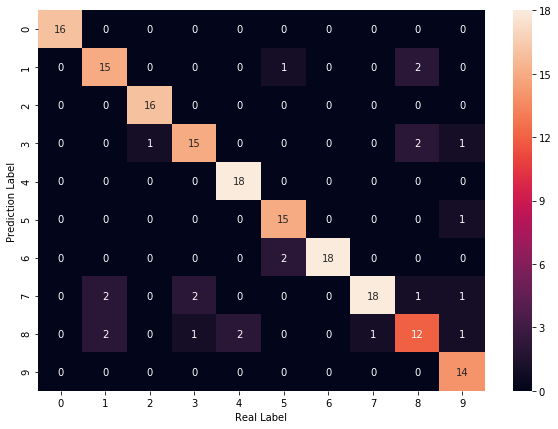

In [14]:
import seaborn as sn


df_cm = pd.DataFrame(cm, index = [i for i in "0123456789"],
                  columns = [i for i in "0123456789"])
plt.figure(figsize = (10,7))
sn.heatmap(df_cm, annot=True)
plt.xlabel('Real Label')
plt.ylabel('Prediction Label')
plt.show()

In [15]:
list_P = []
for i,p_value in enumerate(pred_value):
    print("#{} min_error:{} index:{} real:{}".format(i, error_list[i], p_value[0], digits.target[1617+i]))

#0 min_error:31 index:[1 5] real:5
#1 min_error:29 index:[3] real:2
#2 min_error:26 index:[8] real:8
#3 min_error:8 index:[0] real:0
#4 min_error:19 index:[1] real:1
#5 min_error:20 index:[7] real:7
#6 min_error:11 index:[6] real:6
#7 min_error:15 index:[3] real:3
#8 min_error:13 index:[2] real:2
#9 min_error:17 index:[1] real:1
#10 min_error:29 index:[7] real:7
#11 min_error:28 index:[8] real:4
#12 min_error:13 index:[6] real:6
#13 min_error:17 index:[3] real:3
#14 min_error:14 index:[1] real:1
#15 min_error:26 index:[3] real:3
#16 min_error:34 index:[7] real:9
#17 min_error:19 index:[1] real:1
#18 min_error:29 index:[8] real:7
#19 min_error:9 index:[6] real:6
#20 min_error:21 index:[8] real:8
#21 min_error:14 index:[4] real:4
#22 min_error:15 index:[3] real:3
#23 min_error:19 index:[1] real:1
#24 min_error:11 index:[4] real:4
#25 min_error:14 index:[0] real:0
#26 min_error:17 index:[5] real:5
#27 min_error:11 index:[3] real:3
#28 min_error:22 index:[6] real:6
#29 min_error:25 index:[

In [16]:
pred_value = []
error_list = []

for j in range(1617):
    pred = []
    for i in range(necoc):
        [pred_outputs, real_outputs] = get_pred_real(i, j)
        #print(pred_outputs, real_outputs)
        pred.append(pred_outputs)
    #print(np.array(pred).T)
    
    error = []
    for i in range(10):
        error.append(10 - np.sum(number_codes[i] == np.array(pred).T))
    #print(error)
    
    pred_value.append(np.where(error==np.min(error)))
    error_list.append(np.min(error))
    #print(np.where(error==np.min(error)) )

list_P = []
for i in pred_value:
    if (len(i[0])) == 1:
        list_P.append(i[0][0])
    else:
        random_pick = randint(0, len(i[0])-1)
        list_P.append(i[0][random_pick])
print("Testset acc:{}".format(np.sum(list_P == digits.target[:1617])/1617))
winner_fitness = []
for winner in winner_list:
    #print(winner.fitness)
    winner_fitness.append(winner.fitness)
print("Avg Base Learner:{}".format(np.mean(winner_fitness)))

Testset acc:0.9140383426097711
Avg Base Learner:0.8029313543599258


In [17]:
from random import randint

list_acc = []

for iii in range(necoc):
    pred_value = []
    error_list = []


    for j in range(1617,1617+180):
        pred = []
        for i in range(iii):
            [pred_outputs, real_outputs] = get_pred_real(i, j)
            #print(pred_outputs, real_outputs)
            pred.append(pred_outputs)
        #print(np.array(pred).T)

        error = []
        for i in range(10):
            error.append(iii - np.sum(number_codes[i][:iii] == np.array(pred).T))
        #print(error)

        pred_value.append(np.where(error==np.min(error)))
        error_list.append(np.min(error))
        #print(np.where(error==np.min(error)) )
    list_P = []
    for i in pred_value:
        if (len(i[0])) == 1:
            list_P.append(i[0][0])
        else:
            random_pick = randint(0, len(i[0])-1)
            list_P.append(i[0][random_pick])
    acc = np.sum(list_P == digits.target[1617:])/180
    print("Accuracy on training set: {}".format(acc))
    list_acc.append(acc)

Accuracy on training set: 0.1111111111111111
Accuracy on training set: 0.16111111111111112
Accuracy on training set: 0.20555555555555555
Accuracy on training set: 0.25555555555555554
Accuracy on training set: 0.2611111111111111
Accuracy on training set: 0.3
Accuracy on training set: 0.3111111111111111
Accuracy on training set: 0.4166666666666667
Accuracy on training set: 0.4
Accuracy on training set: 0.4222222222222222
Accuracy on training set: 0.4444444444444444
Accuracy on training set: 0.4722222222222222
Accuracy on training set: 0.48333333333333334
Accuracy on training set: 0.5166666666666667
Accuracy on training set: 0.5444444444444444
Accuracy on training set: 0.5666666666666667
Accuracy on training set: 0.6055555555555555
Accuracy on training set: 0.6444444444444445
Accuracy on training set: 0.6944444444444444
Accuracy on training set: 0.7055555555555556
Accuracy on training set: 0.7055555555555556
Accuracy on training set: 0.7277777777777777
Accuracy on training set: 0.73888888

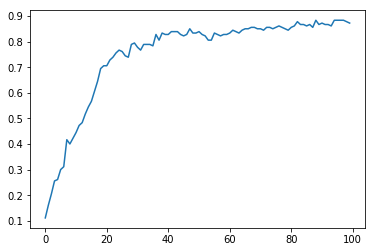

In [18]:
plt.plot(range(necoc),list_acc)
plt.show()

In [20]:
# program to check if there is exist a path between two vertices 
# of a graph 

from collections import defaultdict 

#This class represents a directed graph using adjacency list representation 
class Graph: 

	def __init__(self,vertices): 
		self.V= vertices #No. of vertices 
		self.graph = defaultdict(list) # default dictionary to store graph 

	# function to add an edge to graph 
	def addEdge(self,u,v): 
		self.graph[u].append(v) 
	
	# Use BFS to check path between s and d 
	def isReachable(self, s, d): 
		# Mark all the vertices as not visited 
		visited =[False]*(self.V) 

		# Create a queue for BFS 
		queue=[] 

		# Mark the source node as visited and enqueue it 
		queue.append(s) 
		visited[s] = True

		while queue: 

			#Dequeue a vertex from queue 
			n = queue.pop(0) 
			
			# If this adjacent node is the destination node, 
			# then return true 
			if n == d: 
				return True

			# Else, continue to do BFS 
			for i in self.graph[n]: 
				if visited[i] == False: 
					queue.append(i) 
					visited[i] = True
		# If BFS is complete without visited d 
		return False
    
    
def findAllPath(graph,start,end,path=[]):
    path = path +[start]
    if start == end:
        return [path]
 
    paths = [] #存储所有路径    
    for node in graph[start]:
        if node not in path:
            newpaths = findAllPath(graph,node,end,path) 
            for newpath in newpaths:
                paths.append(newpath)
    return paths

numbers = [*range(2)]
number_of_classification = len(numbers)

list_nodes_number = []
list_connection_number = []

for winner in winner_list:
    used_nodes = list(winner.nodes.keys())
    # create a dict for mapping 
    l1 = numbers + config.genome_config.input_keys + used_nodes[number_of_classification:]
    l2 = range(len(l1))
    dict_nodes = dict(zip(l1, l2))

    ### 将节点加入图
    g = Graph(len(l1))# inputs + outputs + used  
    # add connections in the graph
    for cg in winner.connections.values():
        if cg.enabled:
            g.addEdge(dict_nodes[cg.key[0]],dict_nodes[cg.key[1]])

    v = numbers
    list_connections = []
    for vi in v:
        for u in range(number_of_classification, len(config.genome_config.input_keys) + number_of_classification):
            list_connections.append(g.isReachable(u, vi))

    nodes_inputs = range(number_of_classification, number_of_classification+ 64)
    nodes_outputs = range(number_of_classification)
    nodes_mid = range(number_of_classification + 64, len(dict_nodes))

    # 找到所有输入和输出连接的路
    all_path = []
    for u in nodes_inputs:
        for v in nodes_outputs:
            path = findAllPath(g.graph, u, v)
            if path:
                all_path = all_path + path

    # 得到最长路，以及每个节点在哪个层级
    max_length = max([len(x) for x in all_path])
    nodes_tuples_list = []
    for path in all_path:
        #print(path)
        for node in path:
            nodes_tuples_list.append([node, path.index(node)])

    # 确定节点的层级（消除重复）       
    nodes_tuples_fixed_list = []
    for index in range(max_length):
        for nodes in nodes_tuples_list:
            node, node_index = nodes[0], nodes[1]
            if node_index == index: 
                if nodes not in nodes_tuples_fixed_list:
                    nodes_tuples_fixed_list.append(nodes)


    # 所有有连接的节点
    all_used_nodes = []
    for node in nodes_tuples_fixed_list:
        if node[0] not in all_used_nodes:
            all_used_nodes.append(node[0])

    # 确定节点的层级（最终确定）
    nodes_tuples_fixed_list_final = []

    for node in all_used_nodes:
        if node in nodes_inputs:
            nodes_tuples_fixed_list_final.append([node, 0])
        elif node in nodes_outputs:
            nodes_tuples_fixed_list_final.append([node, max_length - 1])
        else:
            list_node = []
            for nodes in nodes_tuples_fixed_list:
                if node == nodes[0]:
                    list_node.append(nodes)
            layer = 0
            for ele in list_node:
                # 删除重复项，取最大
                if ele[1] > layer:
                    layer = ele[1]
            nodes_tuples_fixed_list_final.append([node,layer])


    # 每个层级的节点合数
    length_of_layers = []
    number_of_nodes = 0
    for index in range(max_length):
        for nodes in nodes_tuples_fixed_list_final:
            node, node_index = nodes[0], nodes[1]
            if node_index == index: 
                number_of_nodes += 1
        length_of_layers.append(number_of_nodes)

    length_of_each_layer = []
    length_of_each_layer.append(length_of_layers[0])
    for i in range(1, max_length):
        length_of_each_layer.append(length_of_layers[i] - length_of_layers[i-1])

    # 输出每个层级的节点个数
    #print("length of each layers:", length_of_each_layer)

    # 所有端到端的路
    all_path_side2side = []
    for path in all_path:
        if len(path) == 2:
            all_path_side2side.append(path)
        else:
            for i in range(len(path)-1):
                all_path_side2side.append([path[i],path[i+1]])

    # 定义节点到绘图的字典
    dict_nodes_graph = dict()
    count_number_layer = [0] * max_length
    for nodes in nodes_tuples_fixed_list_final:
        node, layer = nodes
        dict_nodes_graph[node] = [count_number_layer[layer], layer]
        count_number_layer[layer] += 1
    list_nodes_number.append(np.sum(length_of_each_layer))
    list_connection_number.append(len(all_path_side2side))
    #print("Number of nodes:{} Number of connections:{}".format(np.sum(length_of_each_layer),len(all_path_side2side)))
print("Total nodes:{} Total connections::{}".format(np.sum(list_nodes_number), np.sum(list_connection_number)))

Total nodes:1884 Total connections::2059
